In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor

### Exploaring the data

In [90]:
train = pd.read_csv('Train.csv') # read train data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [91]:
test = pd.read_csv('Test.csv') # read test data
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [92]:
train.shape # in train dataset we have 8523 rows and 12 columns

(8523, 12)

In [93]:
test.shape # in test dataset we have 5681 rows and 11 columns

(5681, 11)

In [94]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [95]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [96]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [97]:
test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

Categorical Features:

Item_Fat_Content<br>
Item_Type<br>
Outlet_Identifier<br>
Outlet_Size<br>
Outlet_Location_Type<br>
Outlet_Type

In [98]:
train.columns[train.isna().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [99]:
test.columns[test.isna().any()]

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [100]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [101]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [102]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [103]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### Data Cleaning

handling Null Values

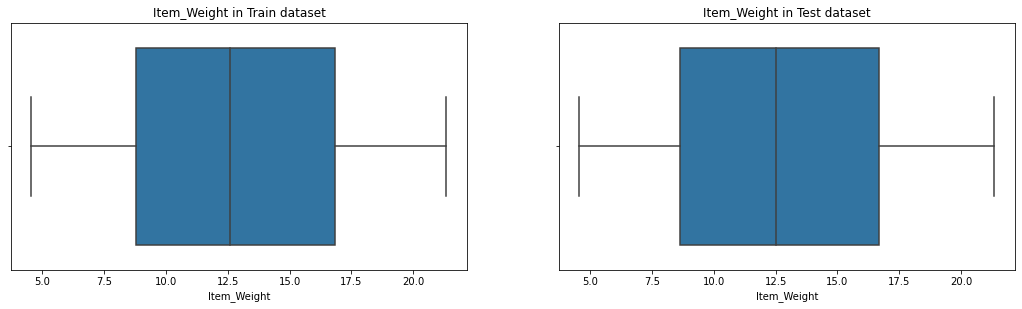

In [104]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
plt.title('Item_Weight in Train dataset')
sns.boxplot(x='Item_Weight', data=train)

plt.subplot(2,2,2)
plt.title('Item_Weight in Test dataset')
sns.boxplot(x='Item_Weight', data=test)

plt.show()

from box plot Item Weight dosen't appear to have outliers in both datasets

In [105]:
# Use the mean to replace the null values in Item_Weight feature
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())
test.Item_Weight = test.Item_Weight.fillna(test.Item_Weight.mean())

In [106]:
train.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [107]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [108]:
test.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

here we can replace the null values with the mode because it is a categorical column

In [109]:
train.Outlet_Size = train.Outlet_Size.fillna(train.Outlet_Size.mode()[0])
test.Outlet_Size = test.Outlet_Size.fillna(test.Outlet_Size.mode()[0])

In [110]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [111]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Data Analysis

In [112]:
train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [113]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [114]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We see there are some irregularities in the column and it is needed to fix them!<br>
for example there is low fat one with upper case and other with lower case and another abbreviated (LF) <br>
also Regular and reg <br>
so we have 2 types of item fat content Low fat and regular


In [115]:
train.Item_Fat_Content = train.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'], value=['Low Fat', 'Low Fat', 'Regular'])

In [116]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [117]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [118]:
test.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

same problem in the testing data

In [119]:
test.Item_Fat_Content = test.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'], value=['Low Fat', 'Low Fat', 'Regular'])

In [120]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [121]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [122]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

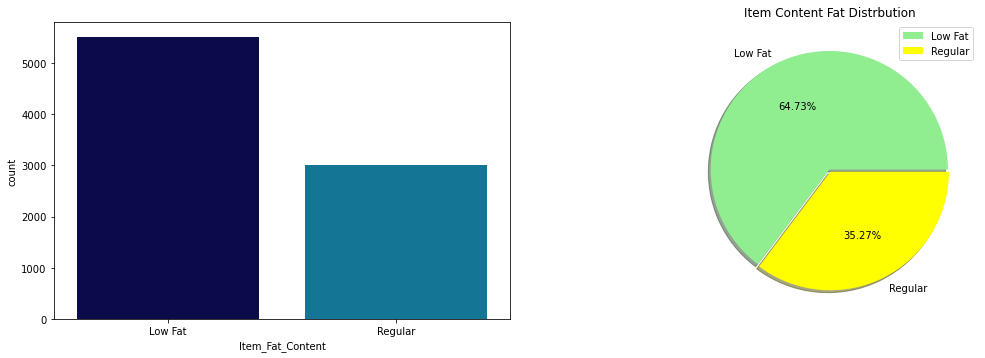

In [123]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='Item_Fat_Content', data=train, palette='ocean')

plt.subplot(2,2,2)
low_fat = train.Item_Fat_Content[train.Item_Fat_Content == 'Low Fat'].count()
reg = train.Item_Fat_Content[train.Item_Fat_Content == 'Regular'].count()
plt.title("Item Content Fat Distrbution")
plt.pie([low_fat, reg], labels=['Low Fat', 'Regular'], explode=[0.01,0.01], autopct="%.2f%%", colors=['lightgreen', 'yellow'], shadow=True)
plt.legend()

plt.show()

**Low Fat has the majority in the data 64.73% but Regular 35.27%**

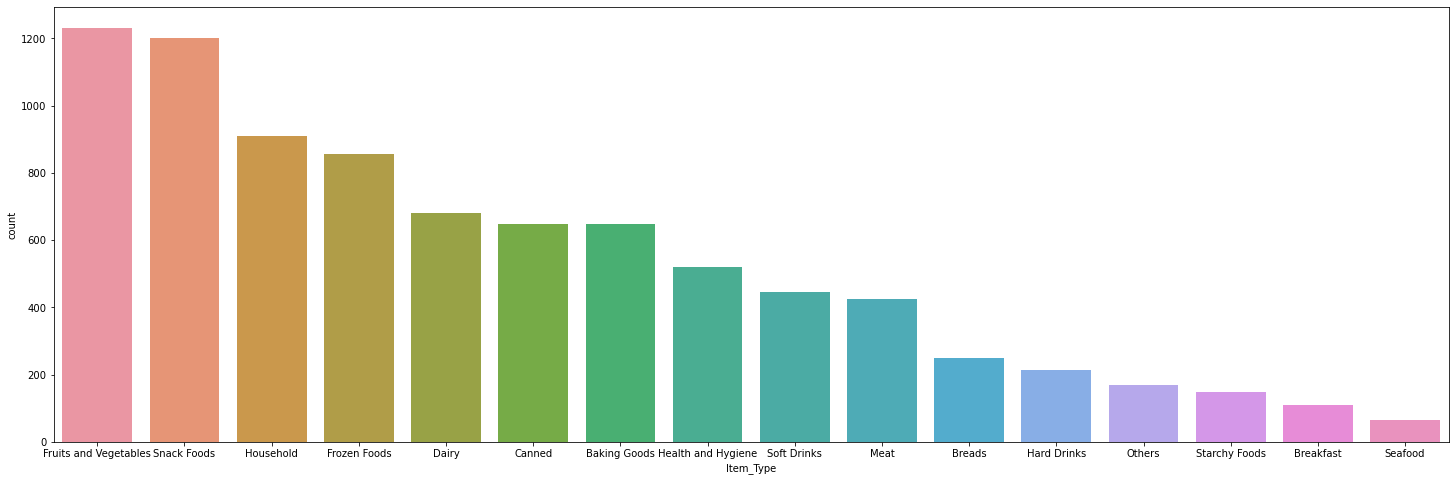

In [124]:
plt.figure(figsize=(25,8))
order = train.groupby('Item_Type').count().sort_values(by='Item_Outlet_Sales', ascending=False).index
sns.countplot(x='Item_Type', data=train, order=order);

**Fruits and Vegetables are largely sold as people tend to use them on daily purpose.**<br>
**Snack Foods too have good sales.**

In [125]:
train.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

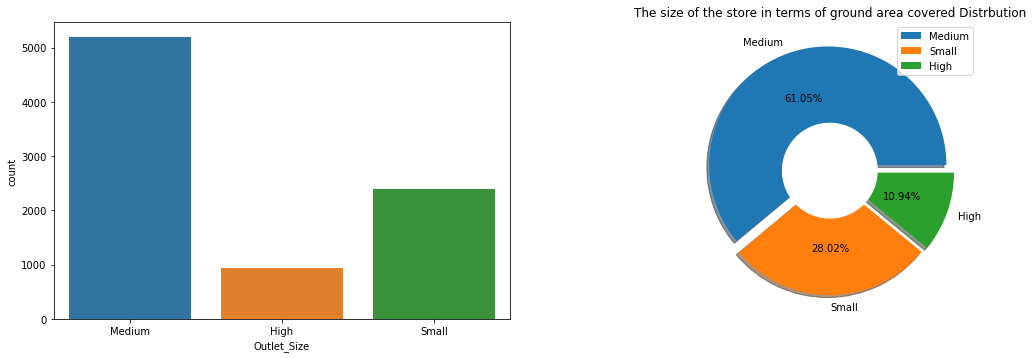

In [126]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='Outlet_Size', data=train)

plt.subplot(2,2,2)
medium = train.Outlet_Size[train.Outlet_Size == 'Medium'].count()
small = train.Outlet_Size[train.Outlet_Size == 'Small'].count()
high = train.Outlet_Size[train.Outlet_Size == 'High'].count()
plt.title("The size of the store in terms of ground area covered Distrbution")
plt.pie([medium, small, high], labels=['Medium', 'Small', 'High'], autopct="%.2f%%", shadow=True, explode=[0.05,0.05,0.05])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()

plt.show()

Medium Size has the majoirty in the data 61.05%

In [127]:
train.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [128]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

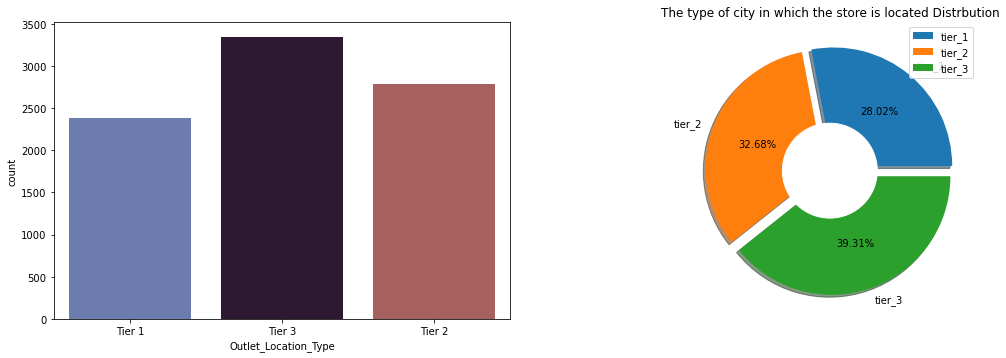

In [129]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='Outlet_Location_Type', data=train, palette='twilight')

plt.subplot(2,2,2)
tier_1 = train.Outlet_Location_Type[train.Outlet_Location_Type == 'Tier 1'].count()
tier_2 = train.Outlet_Location_Type[train.Outlet_Location_Type == 'Tier 2'].count()
tier_3 = train.Outlet_Location_Type[train.Outlet_Location_Type == 'Tier 3'].count()
plt.title("The type of city in which the store is located Distrbution")
plt.pie([tier_1, tier_2, tier_3], labels=['tier_1', 'tier_2', 'tier_3'], autopct="%.2f%%", shadow=True, explode=[0.05,0.05,0.05])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend()

plt.show()

**The Outlets are maximum in number in Tier 3 Cities.**

In [130]:
train.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [131]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

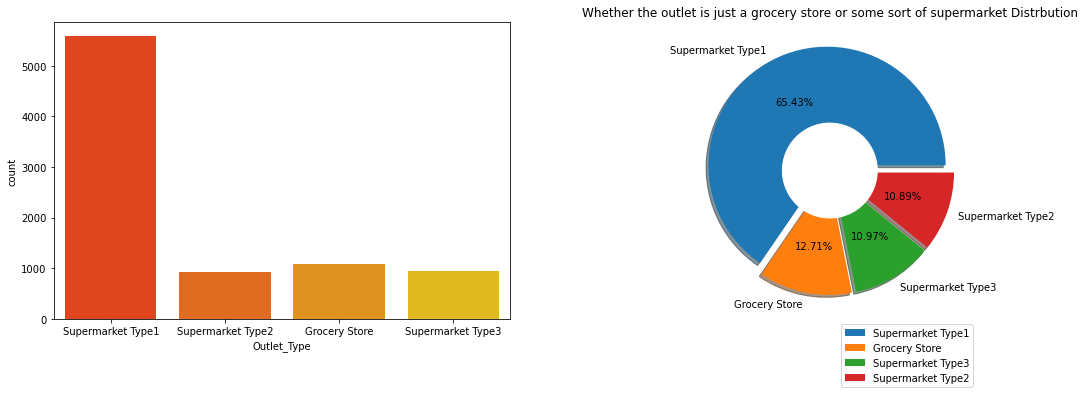

In [132]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.countplot(x='Outlet_Type', data=train, palette='autumn')

plt.subplot(2,2,2)
sup_1 = train.Outlet_Type[train.Outlet_Type == 'Supermarket Type1'].count()
goc = train.Outlet_Type[train.Outlet_Type == 'Grocery Store'].count()
sup_3 = train.Outlet_Type[train.Outlet_Type == 'Supermarket Type3'].count()
sup_2 = train.Outlet_Type[train.Outlet_Type == 'Supermarket Type2'].count()
plt.title("Whether the outlet is just a grocery store or some sort of supermarket Distrbution")
plt.pie([sup_1, goc, sup_3, sup_2], labels=['Supermarket Type1', 'Grocery Store', 'Supermarket Type3', 'Supermarket Type2'], autopct="%.2f%%", shadow=True, explode=[0.05,0.05,0.05, 0.05])
my_circle = plt.Circle( (0,0), 0.4, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.legend(bbox_to_anchor=(1, 0))

plt.show()

**The Outlets are more of Supermarket Type1.**


In [133]:
train.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [134]:
train['Age'] = 2021 - train.Outlet_Establishment_Year
test['Age'] = 2021 - test.Outlet_Establishment_Year

<AxesSubplot:xlabel='Age', ylabel='count'>

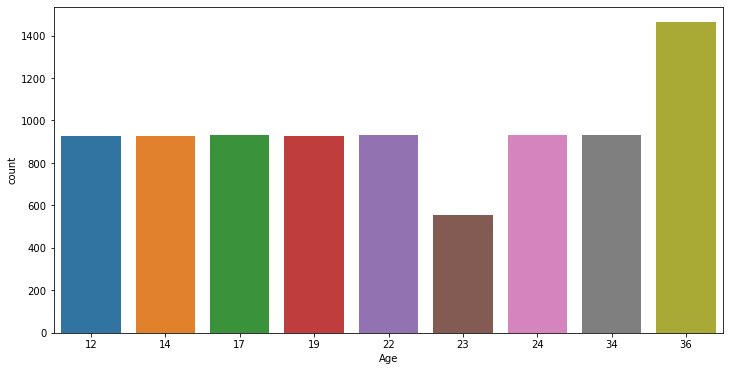

In [135]:
plt.figure(figsize=(12,6))

sns.countplot(x='Age', data=train)

The Outlets are more of established and running from 35 years.


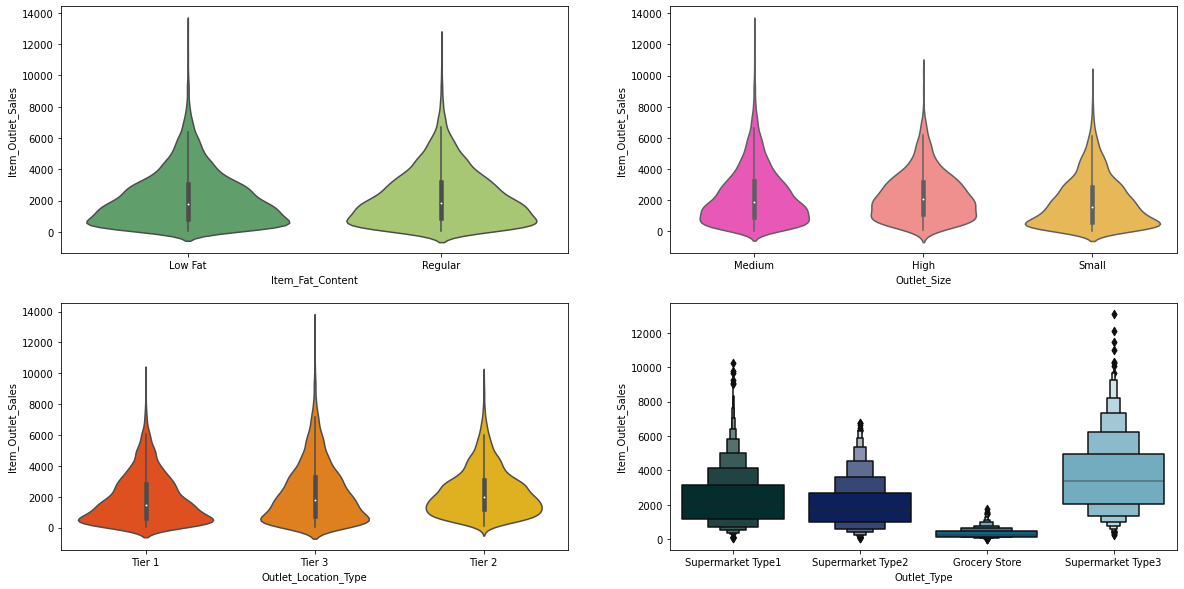

In [136]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.violinplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train, palette='summer');

plt.subplot(2,2,2)
sns.violinplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train, palette='spring');

plt.subplot(2,2,3)
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train, palette='autumn');

plt.subplot(2,2,4)
sns.boxenplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train, palette='ocean');


- The Item Outles sales are high for both Low Fat and Regular Item types.
- The Outlet Sales is maximum for Medium and High sized Outlets.
- The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.
- The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier3 locations maximum Outlets.
- Supermarket Type3 sales tends to be high which in Grocery store is very low

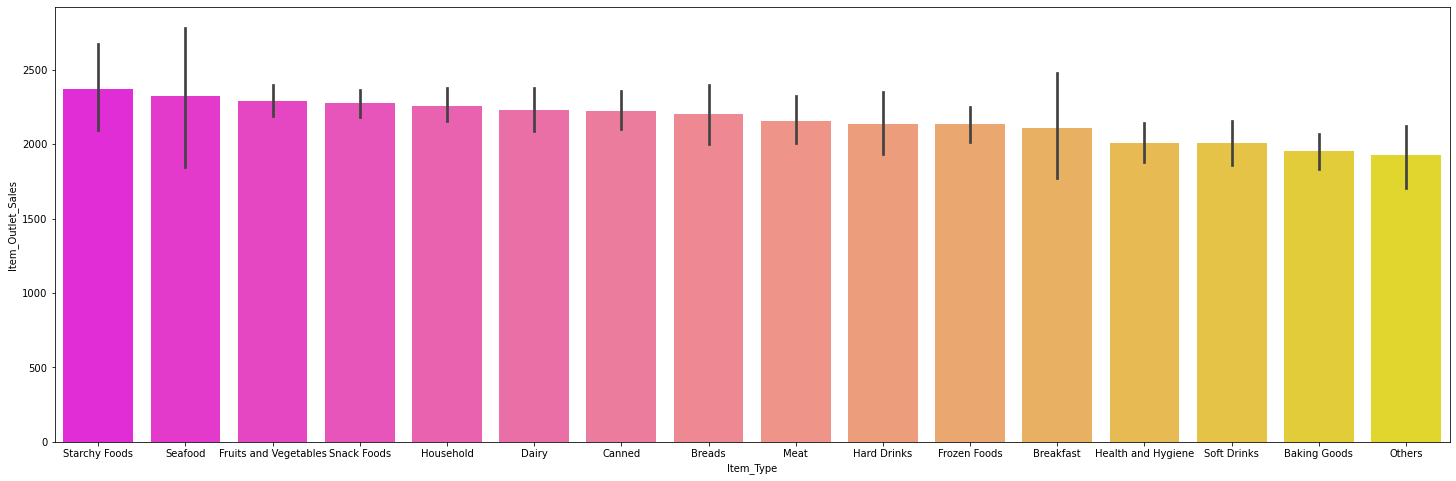

In [137]:
plt.figure(figsize=(25,8))

order=train.groupby('Item_Type').mean().sort_values(by='Item_Outlet_Sales', ascending=False).index
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train,palette='spring', order=order);

**The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers**

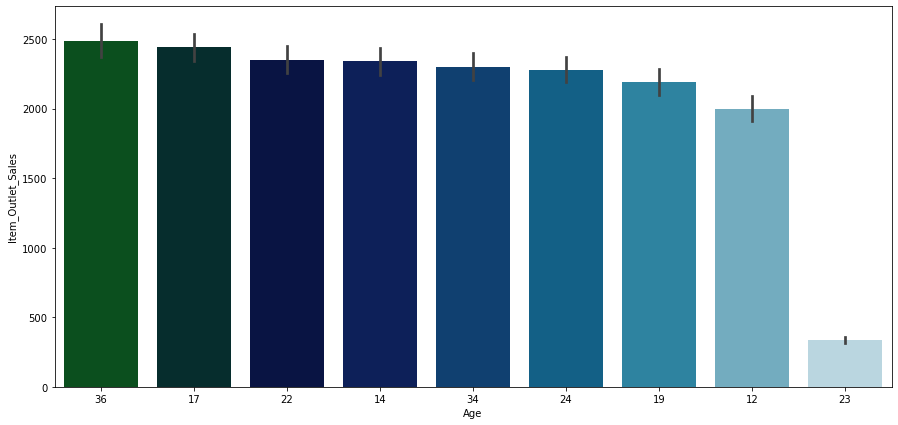

In [138]:
plt.figure(figsize=(15,7))
order=train.groupby('Age').mean().sort_values(by='Item_Outlet_Sales', ascending=False).index
sns.barplot(x='Age', y='Item_Outlet_Sales', data=train, order=order, palette='ocean');

**It is quiet evident that Outlets established 36 years before is having good Sales margin.**<br>
**We also have a outlet which was established before 23 years has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.**

In [139]:
train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Age                             9
dtype: int64

Continous Features:

- Item_Weight
- Item_Visibility
- Item_MRP

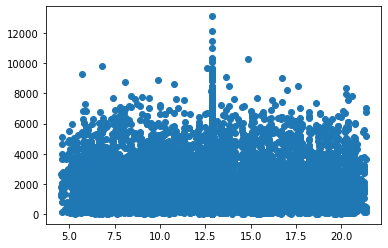

In [140]:
plt.scatter(x='Item_Weight', y='Item_Outlet_Sales', data=train);

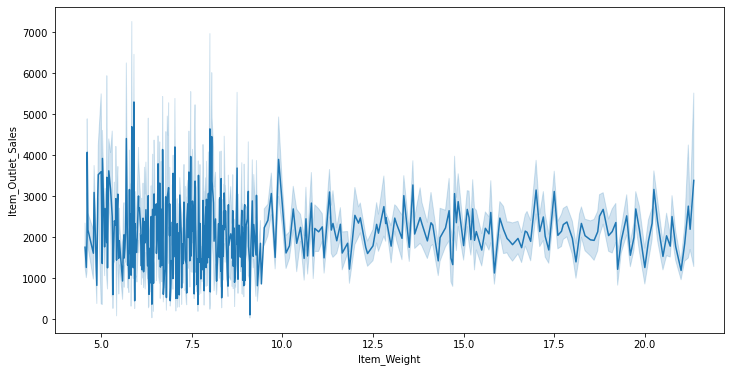

In [141]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Item_Weight', y='Item_Outlet_Sales', data=train);

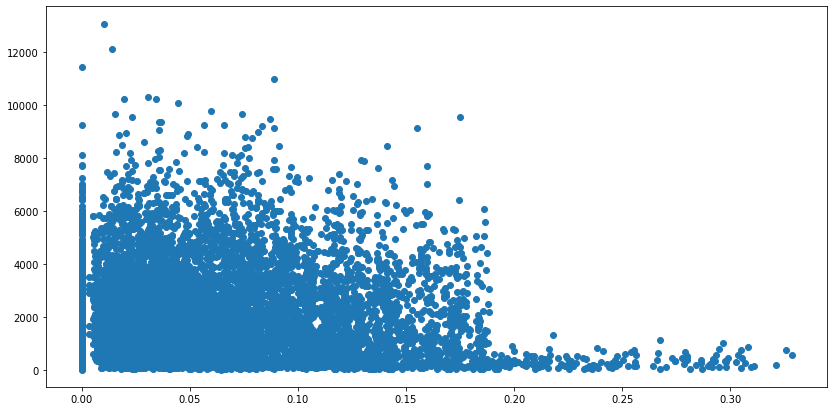

In [142]:
plt.figure(figsize=(14,7))
plt.scatter(x='Item_Visibility', y='Item_Outlet_Sales', data=train);

Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

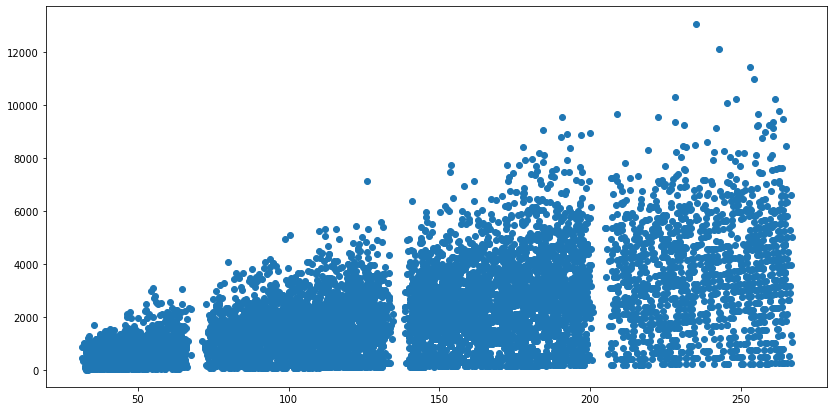

In [143]:
plt.figure(figsize=(14,7))
plt.scatter(x='Item_MRP', y='Item_Outlet_Sales', data=train);

Items MRP ranging from 200-250 dollars is having high Sales.


C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


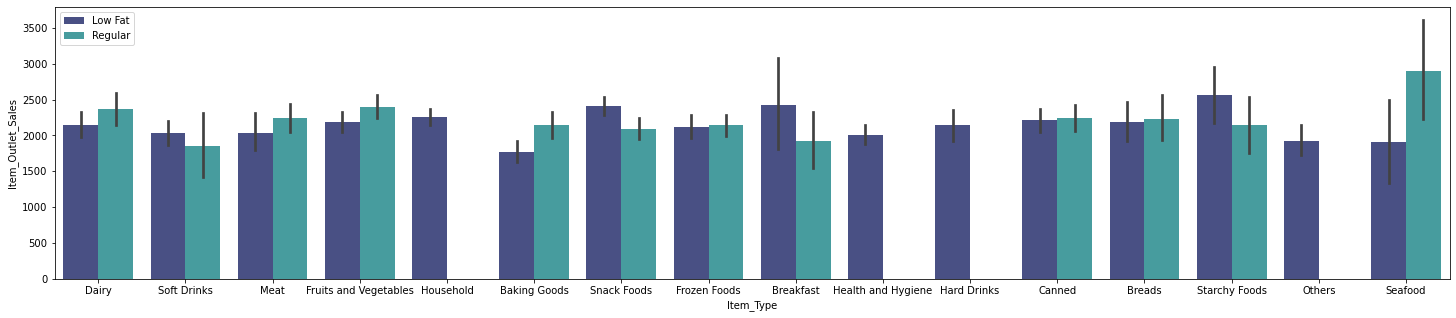

In [144]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend()

**Seafood Regular is highest in price**

C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


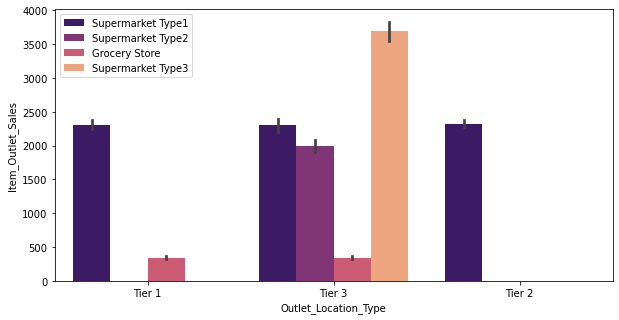

In [145]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()
plt.show()

In [146]:
train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Age                             9
dtype: int64

C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


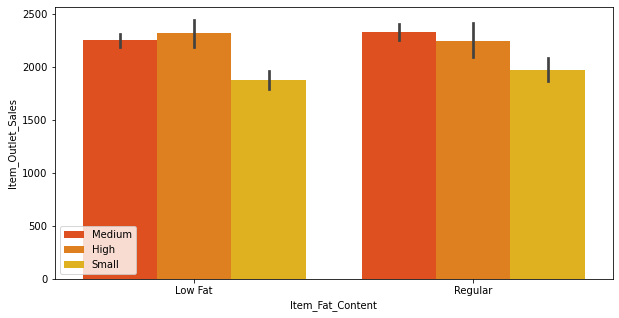

In [147]:
plt.figure(figsize=(10,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',hue='Outlet_Size',data=train,palette='autumn')
plt.legend()
plt.show()

C:\Users\eyada\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


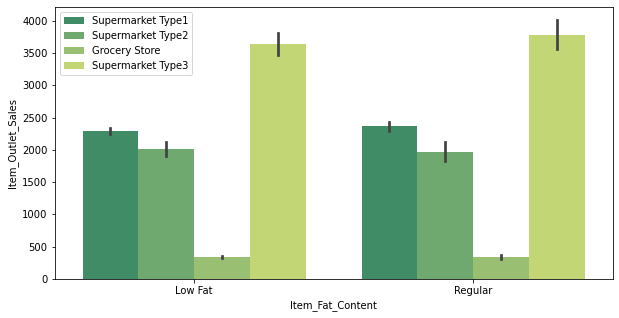

In [148]:
plt.figure(figsize=(10,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='summer')
plt.legend()
plt.show()

The Tier-3 location type has all types of Outlet type and has high sales margin.


### Date PreProcessing

In [149]:
train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
Age                             9
dtype: int64

In [150]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Age                            int64
dtype: object

In [151]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Age                            int64
dtype: object

In [152]:
train.columns[train.isna().any()]

Index([], dtype='object')

#### apply Label Encoder to convert Categorical ordered features to numeric

In [153]:
encode = LabelEncoder()
list_transform = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type']

for i in list_transform:
    train[i] = encode.fit_transform(train[i])
    
for i in list_transform:
    test[i] = encode.fit_transform(test[i])

In [154]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
Age                            int64
dtype: object

In [155]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Age                            int64
dtype: object

In [156]:
#drop non needed features
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [157]:
train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
Item_Weight,1.000000,-0.021157,-0.012049,0.024756,-0.007225,0.004088,-0.000566,0.011550,0.008301
Item_Fat_Content,-0.021157,1.000000,0.047314,0.006063,-0.000622,-0.001598,0.002199,0.018719,-0.003151
Item_Visibility,-0.012049,0.047314,1.000000,-0.001315,0.069309,-0.028099,-0.173468,-0.128625,0.074834
Item_MRP,0.024756,0.006063,-0.001315,1.000000,0.006059,0.000232,-0.001975,0.567574,-0.005020
Outlet_Size,-0.007225,-0.000622,0.069309,0.006059,1.000000,-0.614311,-0.201483,-0.086182,-0.193389
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.000232,-0.614311,1.000000,0.467219,0.089367,0.089216
Outlet_Type,-0.000566,0.002199,-0.173468,-0.001975,-0.201483,0.467219,1.000000,0.401522,0.122304
Item_Outlet_Sales,0.011550,0.018719,-0.128625,0.567574,-0.086182,0.089367,0.401522,1.000000,0.049135
Age,0.008301,-0.003151,0.074834,-0.005020,-0.193389,0.089216,0.122304,0.049135,1.000000


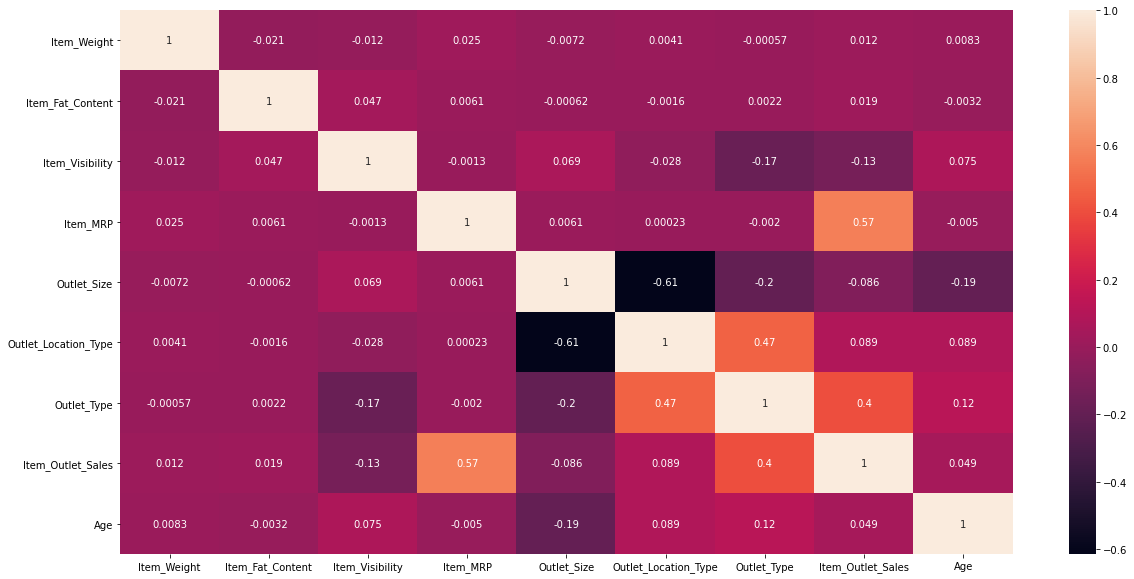

In [158]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True);

#### apply one hot encoder to convert non-order categorical featuers

In [159]:
dummies1 = pd.get_dummies(train.Item_Type)
dummies2 = pd.get_dummies(test.Item_Type)

In [160]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,22
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,12
2,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700,22
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800,23
4,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052,34


In [161]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age
0,20.750000,0,0.007565,Snack Foods,107.8622,1,0,1,22
1,8.300000,1,0.038428,Dairy,87.3198,1,1,1,14
2,14.600000,0,0.099575,Others,241.7538,1,2,0,23
3,7.315000,0,0.015388,Snack Foods,155.0340,1,1,1,14
4,12.695633,1,0.118599,Dairy,234.2300,1,2,3,36


In [162]:
train = pd.concat([train, dummies1], axis=1)
test = pd.concat([test, dummies2], axis=1)

In [163]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0,0.016047,Dairy,249.8092,1,0,1,3735.1380,22,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,Soft Drinks,48.2692,1,2,2,443.4228,12,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,Meat,141.6180,1,0,1,2097.2700,22,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,1,2,0,732.3800,23,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,Household,53.8614,0,2,1,994.7052,34,...,0,0,0,1,0,0,0,0,0,0


In [164]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,Baking Goods,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,20.750000,0,0.007565,Snack Foods,107.8622,1,0,1,22,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300000,1,0.038428,Dairy,87.3198,1,1,1,14,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,0,0.099575,Others,241.7538,1,2,0,23,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315000,0,0.015388,Snack Foods,155.0340,1,1,1,14,0,...,0,0,0,0,0,0,0,1,0,0
4,12.695633,1,0.118599,Dairy,234.2300,1,2,3,36,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
#drop the main feature and one dummy feature
train.drop(['Item_Type', 'Starchy Foods'], axis=1, inplace=True)
test.drop(['Item_Type', 'Starchy Foods'], axis=1, inplace=True)

#### Assign feature and target variables

In [166]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train.Item_Outlet_Sales

### Using GridSearchCV to use the best algorithm

In [167]:
model_params = {
    'Linear_Regression': {
        'model': LinearRegression(),
        'params' : {
        }  
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': np.arange(10,200,10)
        }
    },
    'Lasso' : {
        'model': Lasso(),
        'params': {
        }
    },
    'Ridge' : {
        'model': Ridge(),
        'params': {
        }
    },
    'Bagging': {
        'model': BaggingRegressor(),
        'params' : {
            'n_estimators': np.arange(10,500,10)
        }
    },
    'Boosting': {
        'model': GradientBoostingRegressor(),
        'params' : {
            'n_estimators': np.arange(10,500,10)
        }
    }
}

In [81]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [82]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,Linear_Regression,0.503240,{}
1,random_forest,0.550854,{'n_estimators': 190}
2,Lasso,0.504333,{}
3,Ridge,0.503308,{}
4,Bagging,0.552527,{'n_estimators': 190}
5,Boosting,0.597701,{'n_estimators': 40}


In [168]:
clf.predict(test)

array([1659.97259862, 1390.5993991 ,  606.89006608, ..., 1884.99551885,
       3505.49331499, 1335.8750569 ])

In [169]:
original_test = pd.read_csv("Test.csv")
original_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [170]:
original_test['Outlet_Item_Sales'] = clf.predict(test)

In [171]:
original_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Item_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1659.972599
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1390.599399
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,606.890066
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2484.909607
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5977.411753


In [172]:
original_test.to_csv('Predicted the testing data.csv')